In [1]:
# sonardataset.csv
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('datasets/sonardataset.csv')     # load data
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [212]:
data.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["Y"] = LE.fit_transform(data["Y"])      # type of last column 'Y' is object, has categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [17]:
data['Y'].unique()

array([1, 0], dtype=int64)

This dataset has binary classification

In [19]:
x= data.drop('Y', axis=1)
y= data['Y']

In [21]:
x.shape

(208, 60)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)    # split the data in 80% training - 20% testing

x_train.shape,   y_train.shape,     x_test.shape,   y_test.shape

((166, 60), (166,), (42, 60), (42,))

In [47]:
model = Sequential(
    [
        Input( shape=(x.shape[1],) ),  # input layer
        Dense(10, activation='relu'),  # hidden layer
        Dense(1, activation='sigmoid')  #output layer
    ]
)

In [27]:
model.compile( loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam' ) # configures the model

In [ ]:
history = model.fit( x_train, y_train, epochs=200, batch_size=30, validation_split=0.2, verbose=1 ) # train  the model

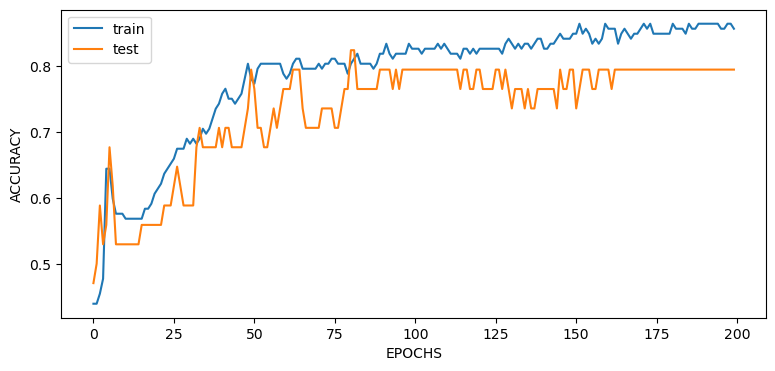

In [31]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')

plt.legend()
plt.show()

The accuracy of training and testing is good and acceptable but testing accuracy is oscillating.

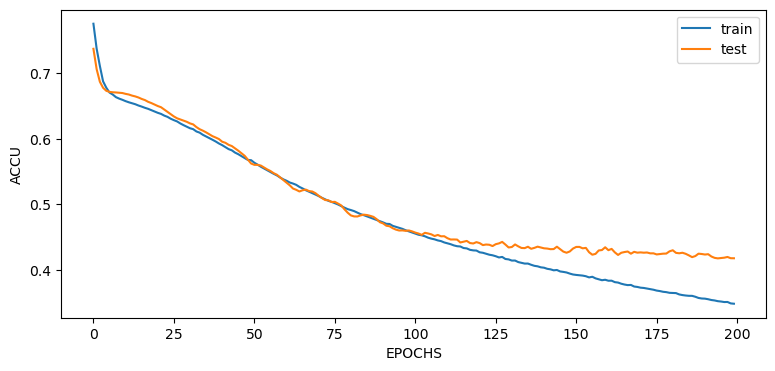

In [33]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)

plt.xlabel('EPOCHS')
plt.ylabel('ACCU')

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()
plt.show()

The loss of training and testing is similar upto 100epochs and after that training loss reducing in good manner but in case of testing, it is slightly reducing

In [35]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8333 - loss: 0.4185


[0.4185238778591156, 0.8333333134651184]

This shows the loss and accuracy respectively

In [ ]:
###!pip install tensorflow scikit-learn
#!pip install scikeras[tensorflow]

In [147]:
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV

Let's try tuning parameters like hidden_layers, no of neurons and optimizer

In [201]:
def create_model(hidden_layers=1, neurons=10,  optimizer='adam'):    # create a model to try different parameters
    model = Sequential()
    model.add(Input( shape=(x.shape[1],) ))  # input layer
    
    for i in range(hidden_layers ):
        model.add(Dense(neurons, activation='relu'))  # hidden
        
    model.add(Dense(1, activation='sigmoid'))  # output layer
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
#kmodel = KerasClassifier(build_fn=create_model, verbose=0 )

keras_estimator = KerasClassifier(model=create_model,  verbose=1)  

# Step 3: Define hyperparameter grid
parameters = {
    'model__hidden_layers': [1, 2],
    'model__neurons' : [10, 15],
    'optimizer': ['adam','SGD', 'tanh'],
    'epochs' : [50,100,200],
    'batch_size': [10,20,30]
}

grid = GridSearchCV( keras_estimator, param_grid= parameters, cv=3 )  
# it uses cross-validation technique to evaluate the model for all specified parameters and gives the best combination of params

grid_result = grid.fit(x_train, y_train)
#grid_result

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4455 - loss: 0.7588
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4455 - loss: 0.7235
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4545 - loss: 0.6947
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4909 - loss: 0.6856 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5455 - loss: 0.6784
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5909 - loss: 0.6736
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6091 - loss: 0.6709
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6182 - loss: 0.6683
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6545 - loss: 0.6652
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6636 - loss: 0.6621
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6818 - loss: 0.6604
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 

In [207]:
# Step 5: View best result
print("Best Accuracy: {:.2f}%".format(grid_result.best_score_ * 100))
print("Best Parameters:", grid_result.best_params_)

Best Accuracy: 81.34%
Best Parameters: {'batch_size': 10, 'epochs': 100, 'model__hidden_layers': 2, 'model__neurons': 15, 'optimizer': 'SGD'}


The best accuracy sccore is 81.34% for 2 hidden layers with 15 neutrons, and optimizer 'SGD' i.e Stochastic Gradient Decent Algorithm.

In [209]:
# Get current timestamp in local timezone
current_time = pd.Timestamp.now()
print(f"Current Timestamp (now()): {current_time}")

Current Timestamp (now()): 2025-11-05 23:43:15.341252
